Using Keras to build and compare 2 different feed-forward NNs with early stopping on the MNIST dataset.

1st NN: Three hidden dense layers of 50 nodes each.

2nd NN: Three hidden dense layers of 200 nodes each but utilizing dropout.

In [1]:
# initial imports
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense

# global variables
seed = 42

C:\Users\nomad\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# loading and parsing the data
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# spliting the data to training, validation and test sets
# dividing by 255.(float)  to scale the pixels down to 0-1 scale
X_train = X_train_full[:-10000]/255.
y_train = y_train_full[:-10000]
X_valid = X_train_full[-10000:]/255.
y_valid = y_train_full[-10000:]
X_test = X_test/255.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# setting the random seed
tf.random.set_seed(seed)

model = tf.keras.Sequential([
    # shape is 28, 28
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    # 3 hidden layers with ReLU activation function
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(50, activation= "relu"),
    # lastly, 10
    tf.keras.layers.Dense(10, activation= "softmax")
])
model.summary()

C:\Users\nomad\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,860 (175.23 KB)

 Trainable params: 44,860 (175.23 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# compiling the model
model.compile(optimizer="Adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [5]:
print("Number of trainable parameters:", model.count_params())

Number of trainable parameters: 44860


In [6]:
def nn_fit(n_patience, n_epochs, b_size = 32):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                    patience = n_patience,
                                                    restore_best_weights = True)

  history = model.fit(X_train, y_train, epochs = n_epochs, batch_size = b_size,
                      validation_data = (X_valid, y_valid),
                      callbacks = [early_stopping])
  return history

history_1 = nn_fit(5, 100, 32)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8287 - loss: 0.5697 - val_accuracy: 0.9513 - val_loss: 0.1681
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9496 - loss: 0.1688 - val_accuracy: 0.9603 - val_loss: 0.1365
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9635 - loss: 0.1210 - val_accuracy: 0.9634 - val_loss: 0.1178
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9705 - loss: 0.0949 - val_accuracy: 0.9653 - val_loss: 0.1159
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9765 - loss: 0.0762 - val_accuracy: 0.9644 - val_loss: 0.1259
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9802 - loss: 0.0635 - val_accuracy: 0.9646 - val_loss: 0.1252
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9835 - loss: 0.0529 - val_accuracy: 0.9688 - val_loss: 0.1194
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9856 - loss: 0

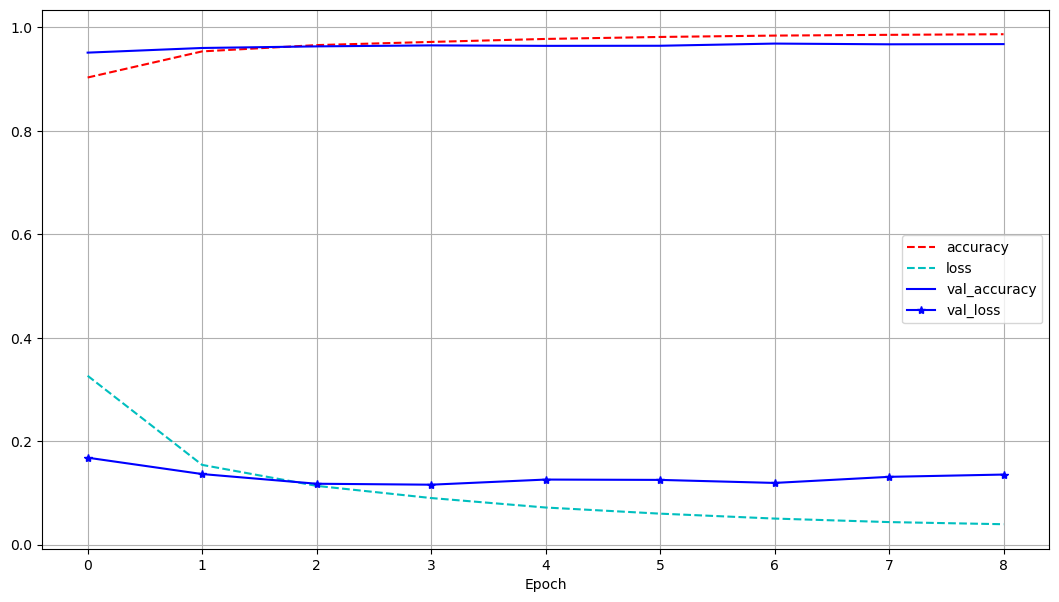

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

def nn_plot(this_history):
  pd.DataFrame(this_history.history).plot(
      figsize = (13, 7), grid = True, xlabel = "Epoch",
      style = ["r--", "c--", "b-", "b-*"])
  plt.show()

nn_plot(history_1)

The training accuracy and validation accuracy seem to hit a plateau. While the training loss is decreassing the same cannot be said for validation loss that seems to have hit a plateau as well. More over the model seems to have stopped at the 12th epoch sice it started to overfit the data. Which we can also see from the gap between val_loss and loss.

In [8]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("The accuracy on the test set is:", (100*test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9586 - loss: 0.1382
The accuracy on the test set is: 96.53000235557556


In [9]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(InputLayer(input_shape=[28, 28]))
model.add(Flatten())
model.add(Dropout(rate=0.2))
model.add(Dense(200, activation="relu",
                kernel_initializer="he_normal"))
model.add(Dropout(rate=0.2))
model.add(Dense(200, activation="relu",
                kernel_initializer="he_normal"))
model.add(Dropout(rate=0.2))
model.add(Dense(200, activation="relu",
                kernel_initializer="he_normal"))
model.add(Dropout(rate=0.2))
model.add(Dense(10, activation="softmax"))

# compiling the model
model.compile(optimizer="Adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])



C:\Users\nomad\anaconda3\lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("The accuracy on the test set is:", (100*test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1226 - loss: 2.3142
The accuracy on the test set is: 12.139999866485596


In [11]:
history_3 = nn_fit(5, 100, 32)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7954 - loss: 0.6268 - val_accuracy: 0.9624 - val_loss: 0.1191
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9345 - loss: 0.2182 - val_accuracy: 0.9681 - val_loss: 0.1135
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9489 - loss: 0.1705 - val_accuracy: 0.9729 - val_loss: 0.0896
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9574 - loss: 0.1461 - val_accuracy: 0.9740 - val_loss: 0.0897
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9606 - loss: 0.1329 - val_accuracy: 0.9741 - val_loss: 0.0889
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9659 - loss: 0.1148 - val_accuracy: 0.9772 - val_loss: 0.0825
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9671 - loss: 0.1066 - val_accuracy: 0.9756 - val_loss: 0.0832
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9682 - loss: 0

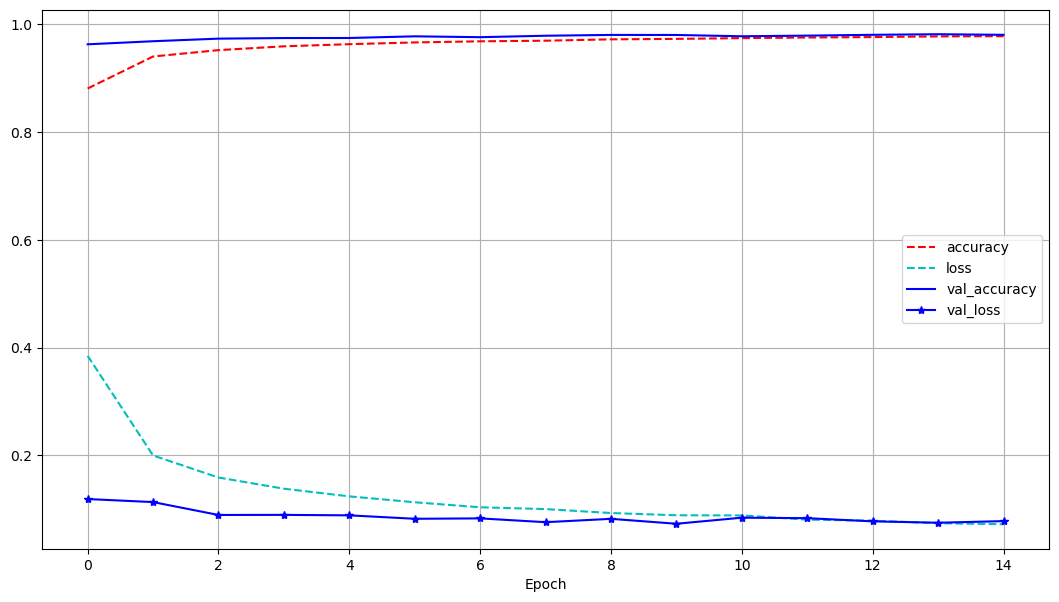

In [12]:
nn_plot(history_3)

Lastly we have the better implementation of the model utilising dropout. Where we can observe that both training accuracy and validation accuracy are slowly increasing. While training loss and validation loss are decreasing and the gap between them is non existant.